In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [3]:
df = pd.read_csv("C://Users//win-10//Downloads//wdbc.data")

In [4]:
col_names=['Id', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 
             'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean','fractal dimension_mean','radius_se', 'texture_se', 'perimeter_se', 
             'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se','fractal dimension_se','radius_worst', 'texture_worst', 'perimeter_worst', 
             'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst','fractal dimension_worst']

df.columns=col_names

df.columns

Index(['Id', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal dimension_worst'],
      dtype='object')

In [5]:
df_x = df.iloc[:,2:]
df_y = df.iloc[:,1]

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_x)
scaled_df = scaler.transform(df_x.values)
final_df = pd.DataFrame(scaled_df,columns=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal dimension_worst'])

In [7]:
final_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension_worst
0,1.832084,-0.358327,1.689106,1.910392,-0.825266,-0.485498,-0.019278,0.555261,0.005315,-0.867817,...,1.813349,-0.371875,1.545063,1.899054,-0.373544,-0.428051,-0.143472,1.095262,-0.240444,0.285294
1,1.582106,0.453860,1.569590,1.560576,0.946192,1.067960,1.375494,2.051509,0.946867,-0.395465,...,1.518626,-0.026387,1.356695,1.463694,0.530042,1.093192,0.861314,1.966468,1.163858,0.205301
2,-0.767117,0.250813,-0.590772,-0.762711,3.290559,3.438483,1.930879,1.463170,2.881262,4.932714,...,-0.278773,0.131690,-0.246823,-0.547953,3.398711,3.918265,1.999398,2.188090,6.086236,4.950457
3,1.752545,-1.158844,1.779774,1.827915,0.283499,0.549886,1.383068,1.439844,-0.005676,-0.560504,...,1.304847,-1.470265,1.347725,1.227507,0.222998,-0.310393,0.618779,0.736081,-0.868555,-0.394649
4,-0.474529,-0.841438,-0.385121,-0.503904,2.243076,1.261043,0.875648,0.833102,1.012812,1.900845,...,-0.162544,-0.316467,-0.111378,-0.241438,2.052104,1.735196,1.270831,0.913379,1.769188,2.250684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,2.113309,0.719921,2.064140,2.345529,1.045953,0.226806,1.962435,2.336608,-0.309757,-0.930418,...,1.908823,0.115393,1.763330,2.024198,0.380907,-0.270108,0.670270,1.639384,-1.363234,-0.707400
564,1.707095,2.087568,1.619045,1.725530,0.105356,-0.012158,0.701459,1.274227,-0.214503,-1.058465,...,1.543532,2.046539,1.431444,1.502471,-0.689361,-0.392242,0.241022,0.740666,-0.530091,-0.972934
565,0.704343,2.047893,0.675278,0.579671,-0.838804,-0.033186,0.051533,0.110766,-0.808010,-0.894849,...,0.565963,1.373490,0.585284,0.432577,-0.807792,0.357189,0.331491,0.419696,-1.106131,-0.315767
566,1.840606,2.339626,1.985836,1.736906,1.530503,3.306575,3.319340,2.676134,2.148537,1.051466,...,1.969013,2.237209,2.316474,1.661104,1.433629,3.929775,3.211108,2.302723,1.935166,2.228464


In [8]:
final_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension_worst
count,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,...,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02
mean,-3.260303e-16,-9.773090e-17,-3.361943e-16,-2.161808e-16,-3.424491e-16,-1.892070e-16,9.733998e-17,6.059316e-17,-5.201239e-16,1.210495e-15,...,-4.577715e-16,-1.776748e-16,2.564459e-16,3.408854e-16,5.856036e-16,-1.090677e-16,1.954618e-18,1.606696e-16,-4.866266e-16,-1.577377e-16
std,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00,...,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00,1.000881e+00
min,-2.028084e+00,-2.239426e+00,-1.983343e+00,-1.452673e+00,-3.113339e+00,-1.618378e+00,-1.116163e+00,-1.263409e+00,-2.749733e+00,-1.822479e+00,...,-1.727485e+00,-2.228057e+00,-1.695760e+00,-1.222144e+00,-2.682077e+00,-1.446753e+00,-1.306098e+00,-1.747619e+00,-2.168714e+00,-1.602325e+00
25%,-6.882885e-01,-7.299958e-01,-6.915362e-01,-6.658008e-01,-7.148167e-01,-7.497918e-01,-7.432977e-01,-7.370131e-01,-7.017652e-01,-7.216298e-01,...,-6.731217e-01,-7.491411e-01,-6.883663e-01,-6.408854e-01,-6.893609e-01,-6.819110e-01,-7.552226e-01,-7.582659e-01,-6.415564e-01,-6.928183e-01
50%,-2.174497e-01,-1.051022e-01,-2.351074e-01,-3.001297e-01,-3.252748e-02,-2.200563e-01,-3.411488e-01,-3.963204e-01,-6.795770e-02,-1.784969e-01,...,-2.673578e-01,-4.349870e-02,-2.831513e-01,-3.402312e-01,-4.456849e-02,-2.665907e-01,-2.158959e-01,-2.216338e-01,-1.257238e-01,-2.149418e-01
75%,4.714094e-01,5.828059e-01,4.929121e-01,3.650176e-01,6.397857e-01,5.040048e-01,5.203283e-01,6.475289e-01,5.337930e-01,4.766772e-01,...,5.218581e-01,6.625511e-01,5.396871e-01,3.435665e-01,6.002240e-01,5.375130e-01,5.292723e-01,7.181219e-01,4.539778e-01,4.544463e-01
max,3.973939e+00,4.661827e+00,3.980523e+00,5.252126e+00,4.779838e+00,4.614186e+00,4.271067e+00,3.951302e+00,4.504249e+00,4.932714e+00,...,4.106797e+00,3.886424e+00,4.307791e+00,5.949491e+00,3.960163e+00,5.144084e+00,4.718768e+00,2.700115e+00,6.086236e+00,6.866962e+00


In [10]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
principalComponents = pca.fit_transform(final_df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2','PC3'])


In [11]:
pd.set_option('display.max_columns', None)
principalDf

,PC1,PC2,PC3
0,2.416345,-3.763969,-0.532821
1,5.768399,-1.051489,-0.557678
2,7.111801,10.335227,-3.226875
3,3.961135,-1.946549,1.409926
4,2.381271,3.975577,-2.924553
...,...,...,...
563,6.490781,-3.568409,2.463196
564,3.848622,-3.569711,2.049607
565,1.297723,-1.889687,0.527700
566,10.429463,1.737100,-1.923257


In [12]:
finalDf = pd.concat([principalDf, df[['Diagnosis']]], axis = 1)

In [13]:
from sklearn.cluster import KMeans

In [389]:
kmeans_pca = KMeans(n_clusters=2, init='random', max_iter=400, n_init=200, random_state=0)
kmeans_pca.fit(principalDf)

KMeans(init='random', max_iter=400, n_clusters=2, n_init=200, random_state=0)

In [390]:
Principal_kmeans = pd.concat([df_x.reset_index(drop=True),pd.DataFrame(principalDf)],axis=1)
Principal_kmeans.columns.values[-3: ]= ['PC1','PC2','PC3']


In [391]:
kmeans_pca.cluster_centers_.tolist()

[[-2.219115211480973, -0.039614643346944145, 0.09088374765981541],
 [4.311752353913811, 0.07697145728033213, -0.1765875926032687]]

In [392]:
from sklearn.metrics import davies_bouldin_score

In [394]:
labels = kmeans_pca.labels_
davies_bouldin_score(principalDf, labels)

0.992760492352676

In [395]:
pk=kmeans_pca.cluster_centers_
pk
pk2=pk[0]
pk2.tolist()

[-2.219115211480973, -0.039614643346944145, 0.09088374765981541]

In [396]:
Principal_kmeans['Segment Kmeans values']= kmeans_pca.labels_

In [397]:
Principal_kmeans.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension_worst,PC1,PC2,PC3,Segment Kmeans values
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2.416345,-3.763969,-0.532821,1
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,5.768399,-1.051489,-0.557678,1
2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,7.111801,10.335227,-3.226875,1
3,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.961135,-1.946549,1.409926,1
4,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,2.381271,3.975577,-2.924553,1


In [398]:
Final_Principle= pd.concat([Principal_kmeans, df[['Diagnosis']]], axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


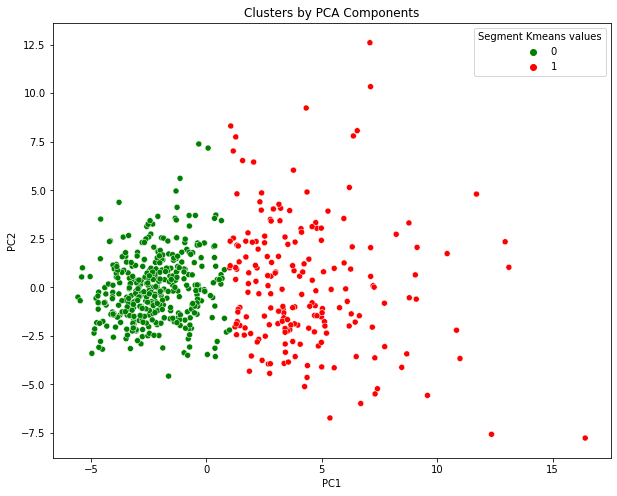

In [400]:
x_axis=Principal_kmeans['PC1']
y_axis=Principal_kmeans['PC2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis, hue =Principal_kmeans['Segment Kmeans values'],palette=['g','r'] )
plt.title('Clusters by PCA Components')
plt.show()

In [401]:
Final_Principle.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension_worst,PC1,PC2,PC3,Segment Kmeans values,Diagnosis
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2.416345,-3.763969,-0.532821,1,M
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,5.768399,-1.051489,-0.557678,1,M
2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,7.111801,10.335227,-3.226875,1,M
3,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.961135,-1.946549,1.409926,1,M
4,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,2.381271,3.975577,-2.924553,1,M


In [402]:
kmeans_pca.cluster_centers_

array([[-2.21911521, -0.03961464,  0.09088375],
       [ 4.31175235,  0.07697146, -0.17658759]])

In [403]:
#Final_Principle[(Final_Principle['Segment Kmeans values']==0)&(Final_Principle['Diagnosis']=='M')].count()
#df[(df['A']>0) & (df['B']>0) & (df['C']>0)].count()

In [404]:
from sklearn.cluster import KMeans

In [405]:
kmeans_pca = KMeans(n_clusters=3,init='k-means++',random_state=20)
kmeans_pca.fit(principalDf)

KMeans(n_clusters=3, random_state=20)

In [406]:
Principal_kmeans = pd.concat([df_x.reset_index(drop=True),pd.DataFrame(principalDf)],axis=1)
Principal_kmeans.columns.values[-30: ]= ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30']


In [407]:
Principal_kmeans['Segment Kmeans values']= kmeans_pca.labels_

In [408]:
Principal_kmeans.head()

,radius_mean,texture_mean,perimeter_mean,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,Segment Kmeans values
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2.416345,-3.763969,-0.532821,2
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,5.768399,-1.051489,-0.557678,2
2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,7.111801,10.335227,-3.226875,1
3,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.961135,-1.946549,1.409926,2
4,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,2.381271,3.975577,-2.924553,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


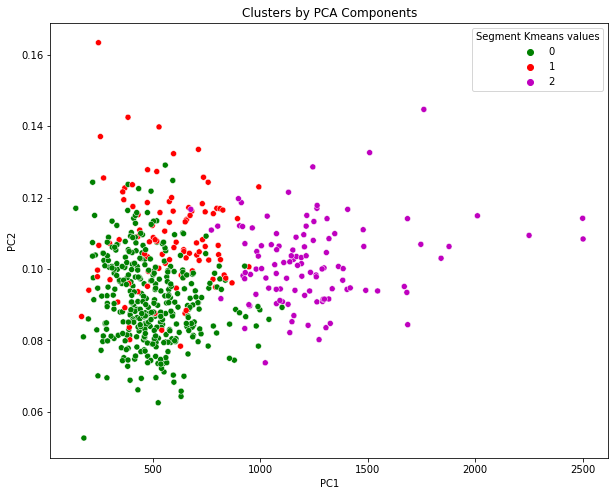

In [409]:
x_axis=Principal_kmeans['PC1']
y_axis=Principal_kmeans['PC2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis, hue =Principal_kmeans['Segment Kmeans values'],palette=['g','r','m'] )
plt.title('Clusters by PCA Components')
plt.show()

In [410]:
Final_Principle2= pd.concat([Principal_kmeans, df[['Diagnosis']]], axis = 1)

In [411]:
Final_Principle2.head()

,radius_mean,texture_mean,perimeter_mean,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,Segment Kmeans values,Diagnosis
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2.416345,-3.763969,-0.532821,2,M
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,5.768399,-1.051489,-0.557678,2,M
2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,7.111801,10.335227,-3.226875,1,M
3,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.961135,-1.946549,1.409926,2,M
4,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,2.381271,3.975577,-2.924553,1,M


In [412]:
Final_Principle2[(Final_Principle2['Segment Kmeans values']==2)&(Final_Principle2['Diagnosis']=='M')].count()

radius_mean              110
texture_mean             110
perimeter_mean           110
PC1                      110
PC2                      110
PC3                      110
PC4                      110
PC5                      110
PC6                      110
PC7                      110
PC8                      110
PC9                      110
PC10                     110
PC11                     110
PC12                     110
PC13                     110
PC14                     110
PC15                     110
PC16                     110
PC17                     110
PC18                     110
PC19                     110
PC20                     110
PC21                     110
PC22                     110
PC23                     110
PC24                     110
PC25                     110
PC26                     110
PC27                     110
PC28                     110
PC29                     110
PC30                     110
Segment Kmeans values    110
Diagnosis     

In [413]:
kmeans_pca.cluster_centers_

array([[-2.28674099, -0.26044642,  0.07486893],
       [ 2.35317468,  3.02983915, -0.73251554],
       [ 5.34523382, -1.87685283,  0.41491904]])

In [414]:
from sklearn.metrics import davies_bouldin_score

In [415]:
labels = kmeans_pca.labels_
davies_bouldin_score(principalDf, labels)

1.1032768703063185

In [416]:
from sklearn.cluster import KMeans

In [417]:
kmeans_pca = KMeans(n_clusters=5,init='k-means++',random_state=20)
kmeans_pca.fit(principalDf)

KMeans(n_clusters=5, random_state=20)

In [418]:
Principal_kmeans = pd.concat([df_x.reset_index(drop=True),pd.DataFrame(principalDf)],axis=1)
Principal_kmeans.columns.values[-30: ]= ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30']


In [419]:
Principal_kmeans['Segment Kmeans values']= kmeans_pca.labels_

In [420]:
Principal_kmeans.head()

,radius_mean,texture_mean,perimeter_mean,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,Segment Kmeans values
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2.416345,-3.763969,-0.532821,4
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,5.768399,-1.051489,-0.557678,4
2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,7.111801,10.335227,-3.226875,3
3,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.961135,-1.946549,1.409926,4
4,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,2.381271,3.975577,-2.924553,3


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


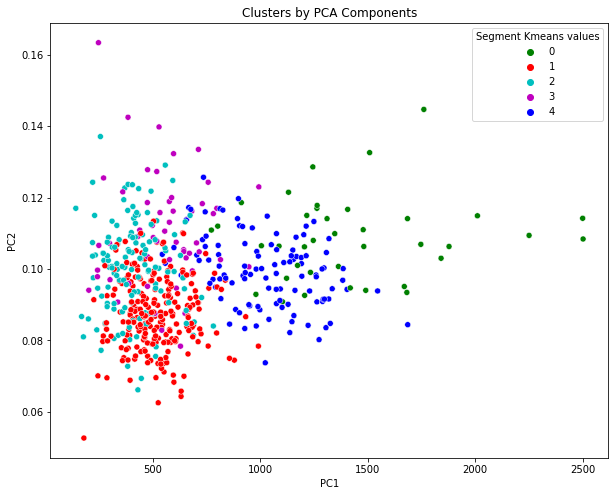

In [423]:
x_axis=Principal_kmeans['PC1']
y_axis=Principal_kmeans['PC2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis, hue =Principal_kmeans['Segment Kmeans values'],palette=['g','r','c','m','b'] )
plt.title('Clusters by PCA Components')
plt.show()

In [424]:
Final_Principle3= pd.concat([Principal_kmeans, df[['Diagnosis']]], axis = 1)

In [425]:
Final_Principle3.head()

,radius_mean,texture_mean,perimeter_mean,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,Segment Kmeans values,Diagnosis
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2.416345,-3.763969,-0.532821,4,M
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,5.768399,-1.051489,-0.557678,4,M
2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,7.111801,10.335227,-3.226875,3,M
3,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.961135,-1.946549,1.409926,4,M
4,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,2.381271,3.975577,-2.924553,3,M


In [426]:
Final_Principle3[(Final_Principle3['Segment Kmeans values']==4)&(Final_Principle3['Diagnosis']=='B')].count()

radius_mean              0
texture_mean             0
perimeter_mean           0
PC1                      0
PC2                      0
PC3                      0
PC4                      0
PC5                      0
PC6                      0
PC7                      0
PC8                      0
PC9                      0
PC10                     0
PC11                     0
PC12                     0
PC13                     0
PC14                     0
PC15                     0
PC16                     0
PC17                     0
PC18                     0
PC19                     0
PC20                     0
PC21                     0
PC22                     0
PC23                     0
PC24                     0
PC25                     0
PC26                     0
PC27                     0
PC28                     0
PC29                     0
PC30                     0
Segment Kmeans values    0
Diagnosis                0
dtype: int64

In [427]:
kmeans_pca.cluster_centers_

array([[ 8.38463876, -1.22596105,  1.24531021],
       [-2.68773162, -0.94587465, -0.16567078],
       [-1.5694515 ,  1.58764078,  0.5912161 ],
       [ 3.2431777 ,  4.2433682 , -0.65173364],
       [ 3.09193061, -1.5986937 , -0.48105006]])

In [428]:
from sklearn.metrics import davies_bouldin_score

In [429]:
labels = kmeans_pca.labels_
davies_bouldin_score(principalDf, labels)

1.2114167116445376